# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [3]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [4]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

La ultima dimensión me indica cuantas matrices tengo

In [5]:
X_train[0,:,:,0] # intensidad del color Rojo, en 1 el verde, 2 azul
# la dimension 1 es la imagen, la 2 es 32 y la trae completa al igual que la tercera 32: la ultima es si es rojo, verde o azul

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ..., 
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

In [6]:
nb_classes = y_train.max() + 1
# para que el algoritmo entienda las categorias le debo dar una matriz, esto debido a que 
# la calsificación puede ser no 1 a 1. Cada Y es un vector 1 si pertenece a la categoria y o si no
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [7]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
y_train[0]

array([6])

In [10]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], dtype=float32)

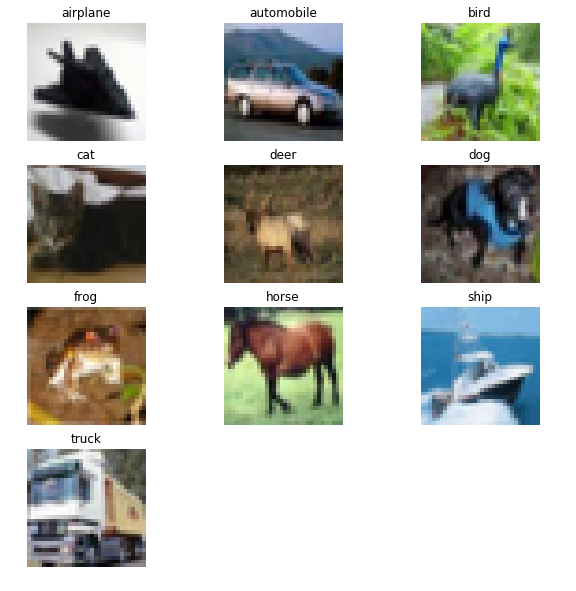

In [11]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

Objetivo: me llega una imagen y quiero predecir a que imagen pertenece.
regresión Softmax es una multivariada donde suman 1.

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

To resolve this point, and the rest for this notebook, we will follow the next structure

1. Create an empty Grapho
2. Reshape the data to a vector
3. Create a dense layer with 10 outputs (one for each class)
4. Add a Softmax activation 
5. Compile the model 
6. Fit the model with 50 epochs, in this step we will use a 20% validation set, just for aviod the overfitting.
7. Predict the model


In [27]:
model = Sequential() # crea un grafo vacío
model.add(Flatten(input_shape=X_train.shape[1:])) # Coloca en un solo vector 32*32*3 en un vector de 1*1024
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


We got a total of 30,730 parameters

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.fit(X_train, Y_train, epochs = 50, verbose = 2, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 1s - loss: 2.3665 - acc: 0.2058 - val_loss: 2.2199 - val_acc: 0.2660
Epoch 2/50
 - 1s - loss: 2.1619 - acc: 0.2671 - val_loss: 2.1790 - val_acc: 0.2640
Epoch 3/50
 - 0s - loss: 2.0975 - acc: 0.2869 - val_loss: 2.4636 - val_acc: 0.2520
Epoch 4/50
 - 0s - loss: 2.0654 - acc: 0.3044 - val_loss: 2.5858 - val_acc: 0.2245
Epoch 5/50
 - 0s - loss: 2.0542 - acc: 0.3076 - val_loss: 2.3385 - val_acc: 0.2510
Epoch 6/50
 - 0s - loss: 2.0146 - acc: 0.3194 - val_loss: 1.9535 - val_acc: 0.3355
Epoch 7/50
 - 0s - loss: 2.0006 - acc: 0.3298 - val_loss: 2.2247 - val_acc: 0.2910
Epoch 8/50
 - 0s - loss: 1.9869 - acc: 0.3344 - val_loss: 2.0301 - val_acc: 0.3390
Epoch 9/50
 - 1s - loss: 1.9705 - acc: 0.3337 - val_loss: 2.1617 - val_acc: 0.2770
Epoch 10/50
 - 1s - loss: 1.9356 - acc: 0.3468 - val_loss: 2.1044 - val_acc: 0.3095
Epoch 11/50
 - 0s - loss: 1.9514 - acc: 0.3416 - val_loss: 1.9714 - val_acc: 0.3330
Epoch 12/50
 - 0s - loss: 1.9130 - ac

In [30]:
model_pred = model.predict_classes(X_test)

In [31]:
print('the accuracy model is=',(model_pred==y_test[:,0]).mean())

the accuracy model is= 0.3296


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

The difference between this and the previous model are:

1. We include a convolutional layer, this means we would like to focus on an specific patrons of the image, such as shapes, lines,  etc.
2. Downsampling the images through the MaxPolling function.
3. Dropout some of the neurons, in this case 50% of them, to avoid the overfitting in the model and increase the optimization rate

In [32]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))
model_1.add(Flatten())
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [33]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

We can use the bath keyword to divide the number of iteration inside the NN, but it wouldn´t be neccesary because the training time it is not too long.

In [34]:
model_1.fit(X_train, Y_train, epochs = 50, verbose = 2, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 9s - loss: 1.8940 - acc: 0.3206 - val_loss: 1.7250 - val_acc: 0.3995
Epoch 2/50
 - 8s - loss: 1.5868 - acc: 0.4441 - val_loss: 1.5300 - val_acc: 0.4720
Epoch 3/50
 - 8s - loss: 1.4446 - acc: 0.4951 - val_loss: 1.4955 - val_acc: 0.4715
Epoch 4/50
 - 8s - loss: 1.3627 - acc: 0.5259 - val_loss: 1.4024 - val_acc: 0.5070
Epoch 5/50
 - 8s - loss: 1.2889 - acc: 0.5571 - val_loss: 1.4241 - val_acc: 0.5085
Epoch 6/50
 - 8s - loss: 1.2401 - acc: 0.5724 - val_loss: 1.3393 - val_acc: 0.5265
Epoch 7/50
 - 8s - loss: 1.1902 - acc: 0.5887 - val_loss: 1.3520 - val_acc: 0.5465
Epoch 8/50
 - 8s - loss: 1.1592 - acc: 0.6031 - val_loss: 1.3301 - val_acc: 0.5325
Epoch 9/50
 - 8s - loss: 1.1235 - acc: 0.6084 - val_loss: 1.3050 - val_acc: 0.5415
Epoch 10/50
 - 8s - loss: 1.0978 - acc: 0.6217 - val_loss: 1.2976 - val_acc: 0.5695
Epoch 11/50
 - 8s - loss: 1.0697 - acc: 0.6272 - val_loss: 1.2967 - val_acc: 0.5575
Epoch 12/50
 - 8s - loss: 1.0467 - ac

In [35]:
model_pred_1 = model_1.predict_classes(X_test)

We predict over the y_test in not capital letters, because this variable contains the class which each prediction belongs to

In [36]:
print('the prediction model is=',(model_pred_1==y_test[:,0]).mean())

the prediction model is= 0.5699


# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [37]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

Know, we will use a pre-trained model to predict the 10 classes of this excercise, there are many of them but we will work with VGG16

In [38]:
x_train_pre=model_vgg16.predict(X_train)

In [39]:
x_train_pre.shape

(10000, 1, 1, 512)

In this excercise we got an array of (10000, 1, 1, 512) so that means that we have 10 thousand observations with a shape of 1,1,512, so this last parameters will be the input of our next neural network.

In [40]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(1,1,512)))
model_3.add(Dense(512, activation = 'relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation = 'softmax'))

In [41]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model_3.fit(x_train_pre, Y_train, epochs = 50, verbose = 2)

Epoch 1/50
 - 2s - loss: 1.6704 - acc: 0.4126
Epoch 2/50
 - 2s - loss: 1.4058 - acc: 0.5109
Epoch 3/50
 - 2s - loss: 1.3200 - acc: 0.5371
Epoch 4/50
 - 2s - loss: 1.2605 - acc: 0.5586
Epoch 5/50
 - 2s - loss: 1.2211 - acc: 0.5767
Epoch 6/50
 - 2s - loss: 1.1903 - acc: 0.5846
Epoch 7/50
 - 2s - loss: 1.1553 - acc: 0.5955
Epoch 8/50
 - 2s - loss: 1.1329 - acc: 0.6029
Epoch 9/50
 - 2s - loss: 1.1053 - acc: 0.6164
Epoch 10/50
 - 2s - loss: 1.0813 - acc: 0.6227
Epoch 11/50
 - 2s - loss: 1.0610 - acc: 0.6306
Epoch 12/50
 - 2s - loss: 1.0467 - acc: 0.6408
Epoch 13/50
 - 2s - loss: 1.0202 - acc: 0.6492
Epoch 14/50
 - 2s - loss: 0.9990 - acc: 0.6561
Epoch 15/50
 - 2s - loss: 0.9869 - acc: 0.6613
Epoch 16/50
 - 2s - loss: 0.9579 - acc: 0.6634
Epoch 17/50
 - 2s - loss: 0.9608 - acc: 0.6719
Epoch 18/50
 - 2s - loss: 0.9338 - acc: 0.6780
Epoch 19/50
 - 2s - loss: 0.9168 - acc: 0.6842
Epoch 20/50
 - 2s - loss: 0.9109 - acc: 0.6811
Epoch 21/50
 - 2s - loss: 0.8898 - acc: 0.6968
Epoch 22/50
 - 2s - lo

In [43]:
x_test_pre=model_vgg16.predict(X_test)

In [44]:
model_pred_3 = model_3.predict_classes(x_test_pre)

In [45]:
print('the prediction model is=',(model_pred_3==y_test[:,0]).mean())

the prediction model is= 0.5758


# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

For this excercise we will use the ResNet50 algorithm,

In [46]:
from keras.applications.resnet50 import ResNet50
model_Res_Net = ResNet50(weights='imagenet', include_top=False)

In [47]:
x_train_Res_Net=model_Res_Net.predict(X_train)

In [48]:
x_train_Res_Net.shape

(10000, 1, 1, 2048)

Once we predict the new X variable, we got an array of (10000, 1, 1, 2048), so as we did before, the last three numbers we will used as the input shape of the new array

In [49]:
model_4 = Sequential()
model_4.add(Flatten(input_shape=(1,1,2048)))
model_4.add(Dense(512, activation = 'relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation = 'softmax'))

In [50]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [51]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,054,218
Trainable params: 1,054,218
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_4.fit(x_train_Res_Net, Y_train, epochs = 50, verbose = 2)

Epoch 1/50
 - 8s - loss: 2.3267 - acc: 0.1352
Epoch 2/50
 - 7s - loss: 2.1741 - acc: 0.1957
Epoch 3/50
 - 7s - loss: 2.1057 - acc: 0.2249
Epoch 4/50
 - 6s - loss: 2.0681 - acc: 0.2404
Epoch 5/50
 - 6s - loss: 2.0425 - acc: 0.2504
Epoch 6/50
 - 6s - loss: 2.0208 - acc: 0.2580
Epoch 7/50
 - 6s - loss: 2.0013 - acc: 0.2674
Epoch 8/50
 - 6s - loss: 2.0033 - acc: 0.2641
Epoch 9/50
 - 6s - loss: 1.9862 - acc: 0.2691
Epoch 10/50
 - 6s - loss: 1.9745 - acc: 0.2675
Epoch 11/50
 - 6s - loss: 1.9683 - acc: 0.2832
Epoch 12/50
 - 6s - loss: 1.9706 - acc: 0.2756
Epoch 13/50
 - 6s - loss: 1.9595 - acc: 0.2823
Epoch 14/50
 - 6s - loss: 1.9620 - acc: 0.2839
Epoch 15/50
 - 6s - loss: 1.9452 - acc: 0.2888
Epoch 16/50
 - 6s - loss: 1.9502 - acc: 0.2917
Epoch 17/50
 - 6s - loss: 1.9526 - acc: 0.2852
Epoch 18/50
 - 6s - loss: 1.9386 - acc: 0.2876
Epoch 19/50
 - 6s - loss: 1.9314 - acc: 0.2919
Epoch 20/50
 - 6s - loss: 1.9345 - acc: 0.2963
Epoch 21/50
 - 6s - loss: 1.9294 - acc: 0.2874
Epoch 22/50
 - 6s - lo

In [53]:
x_test_ResN=model_Res_Net.predict(X_test)

In [54]:
model_pred_4 = model_4.predict_classes(x_test_ResN)

In [55]:
print('the prediction model is=',(model_pred_4==y_test[:,0]).mean())

the prediction model is= 0.2977


The final results are showed below, so we can see that the best model it is the third one, VGG16 pre-trained model and the worse one was the model without dense layers.

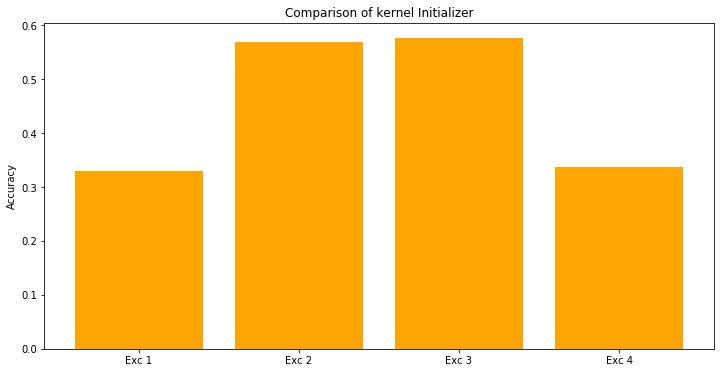

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(["Exc 1","Exc 2","Exc 3","Exc 4"],[0.3296,0.5693,0.5758,0.337],color="orange",align='center')
plt.title("Comparison of kernel Initializer")
plt.xlabel("",fontsize=12)
plt.ylabel("Accuracy")
plt.show()